# Analysis of Agricultural Raw Material Prices (1990–2020)

This project presents a detailed analysis of historical prices for agricultural raw materials such as cotton, rubber, timber, and leather between 1990 and 2020. Using data cleaning techniques, exploratory visualizations, correlation analysis, and percent change metrics, the project aims to explore:

1. **Time trends** — how prices evolved over the decades.
2. **Market volatility** — which commodities had the most price fluctuations.
3. **Product relationships** — whether some commodities moved together.
4. **Economic insights** — identifying price peaks, crashes, and possible causes.

All analysis was conducted using Python and libraries such as `pandas`, `seaborn`, and `matplotlib`. Visualizations include line plots, heatmaps, boxplots, and scatter plots to support interpretation.

In [129]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import random as random
#view settings
%matplotlib inline
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (9, 5)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

### Loading the Dataset 

In [73]:
df = pd.read_csv('agricultural_raw_material.csv')

### Exploring the data

In [74]:
df.info

<bound method DataFrame.info of       Month Coarse wool Price Coarse wool price % Change Copra Price  \
0    Apr-90            482.34                          -         236   
1    May-90            447.26                     -7.27%         234   
2    Jun-90            440.99                     -1.40%         216   
3    Jul-90            418.44                     -5.11%         205   
4    Aug-90            418.44                      0.00%         198   
..      ...               ...                        ...         ...   
356  Dec-19               NaN                        NaN         NaN   
357  Jan-20               NaN                        NaN         NaN   
358  Feb-20               NaN                        NaN         NaN   
359  Mar-20               NaN                        NaN         NaN   
360  Apr-20               NaN                        NaN         NaN   

    Copra price % Change  Cotton Price Cotton price % Change Fine wool Price  \
0                      

#### Checking null values of each column

In [75]:
#checkin null values of each column
df.isnull().sum()

Month                            0
Coarse wool Price               34
Coarse wool price % Change      34
Copra Price                     22
Copra price % Change            22
Cotton Price                     0
Cotton price % Change            0
Fine wool Price                 34
Fine wool price % Change        34
Hard log Price                   0
Hard log price % Change          0
Hard sawnwood Price             34
Hard sawnwood price % Change    34
Hide Price                      34
Hide price % change             34
Plywood Price                    0
Plywood price % Change           0
Rubber Price                     0
Rubber price % Change            0
Softlog Price                   34
Softlog price % Change          34
Soft sawnwood Price             34
Soft sawnwood price % Change    34
Wood pulp Price                  1
Wood pulp price % Change         1
dtype: int64

#### Dealing with missing, incorrect and invalid data

In [76]:
#replacing %, ',' and '-'
df = df.replace('%', '', regex=True)
df = df.replace('', ',', regex=True)
df = df.replace('-', '', regex=True)
df = df.replace('%', np.nan)
df = df.replace('May90', np.nan)
df = df.replace('Apr90', np.nan)
#dropping rows with NaN values
df = df.dropna()

#### Checking to see if all Nan values are resolved

In [77]:
df.isnull().sum()

Month                           0
Coarse wool Price               0
Coarse wool price % Change      0
Copra Price                     0
Copra price % Change            0
Cotton Price                    0
Cotton price % Change           0
Fine wool Price                 0
Fine wool price % Change        0
Hard log Price                  0
Hard log price % Change         0
Hard sawnwood Price             0
Hard sawnwood price % Change    0
Hide Price                      0
Hide price % change             0
Plywood Price                   0
Plywood price % Change          0
Rubber Price                    0
Rubber price % Change           0
Softlog Price                   0
Softlog price % Change          0
Soft sawnwood Price             0
Soft sawnwood price % Change    0
Wood pulp Price                 0
Wood pulp price % Change        0
dtype: int64

#### Converting data type to float

In [78]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass
df.dtypes

Month                            object
Coarse wool Price                object
Coarse wool price % Change      float64
Copra Price                      object
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                  object
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


#### Converting some columns that had errors in 'Try' above

In [79]:
df['Coarse wool Price'] = pd.to_numeric(df['Coarse wool Price'], errors='coerce')
df = df.dropna(subset=['Coarse wool Price'])
df['Copra Price'] = pd.to_numeric(df['Copra Price'], errors='coerce')
df = df.dropna(subset=['Copra Price'])
df['Fine wool Price'] = pd.to_numeric(df['Fine wool Price'], errors='coerce')
df = df.dropna(subset=['Fine wool Price'])

In [80]:
for col in df.columns:
    try:
        df[col] = df[col].astype(float)
    except ValueError:
        pass
df.dtypes

Month                            object
Coarse wool Price               float64
Coarse wool price % Change      float64
Copra Price                     float64
Copra price % Change            float64
Cotton Price                    float64
Cotton price % Change           float64
Fine wool Price                 float64
Fine wool price % Change        float64
Hard log Price                  float64
Hard log price % Change         float64
Hard sawnwood Price             float64
Hard sawnwood price % Change    float64
Hide Price                      float64
Hide price % change             float64
Plywood Price                   float64
Plywood price % Change          float64
Rubber Price                    float64
Rubber price % Change           float64
Softlog Price                   float64
Softlog price % Change          float64
Soft sawnwood Price             float64
Soft sawnwood price % Change    float64
Wood pulp Price                 float64
Wood pulp price % Change        float64


In [81]:
df.head()

,Month,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
2,Jun90,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
3,Jul90,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
4,Aug90,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
5,Sep90,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
6,Oct90,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51


#### Date and time columns
formatting the datetime column and defining it as an index for the dataset

In [82]:
df.Month = pd.to_datetime(df.Month.str.upper(), format='%b%y', yearfirst=False)
#indexing month
df = df.set_index('Month')

In [83]:
df.head()

,Coarse wool Price,Coarse wool price % Change,Copra Price,Copra price % Change,Cotton Price,Cotton price % Change,Fine wool Price,Fine wool price % Change,Hard log Price,Hard log price % Change,...,Plywood Price,Plywood price % Change,Rubber Price,Rubber price % Change,Softlog Price,Softlog price % Change,Soft sawnwood Price,Soft sawnwood price % Change,Wood pulp Price,Wood pulp price % Change
Month,,,,,,,,,,,,,,,,,,,,,
1990-06-01,440.99,1.40,216.0,7.69,1.99,5.29,898.24,15.03,181.67,5.10,...,373.94,6.80,0.85,0.00,129.45,4.16,200.00,6.10,831.35,1.32
1990-07-01,418.44,5.11,205.0,5.09,2.01,1.01,895.83,0.27,187.96,3.46,...,378.48,1.21,0.86,1.18,124.23,4.03,210.05,5.03,798.83,3.91
1990-08-01,418.44,0.00,198.0,3.41,1.79,10.95,951.22,6.18,186.13,0.97,...,364.60,3.67,0.88,2.33,129.70,4.40,208.30,0.83,818.74,2.49
1990-09-01,412.18,1.50,196.0,1.01,1.79,0.00,936.77,1.52,185.33,0.43,...,384.92,5.57,0.90,2.27,129.78,0.06,199.59,4.18,811.62,0.87
1990-10-01,394.64,4.26,198.0,1.02,1.79,0.00,901.85,3.73,189.76,2.39,...,409.31,6.34,0.90,0.00,121.31,6.53,206.98,3.70,807.46,0.51


### Exploratory analysis and visualization with matplotlib and seaborn

#### The heat map below helps to understand whether the price of a certain raw material is correlated with the price of another raw material
the closer to 1 the higher the correlation

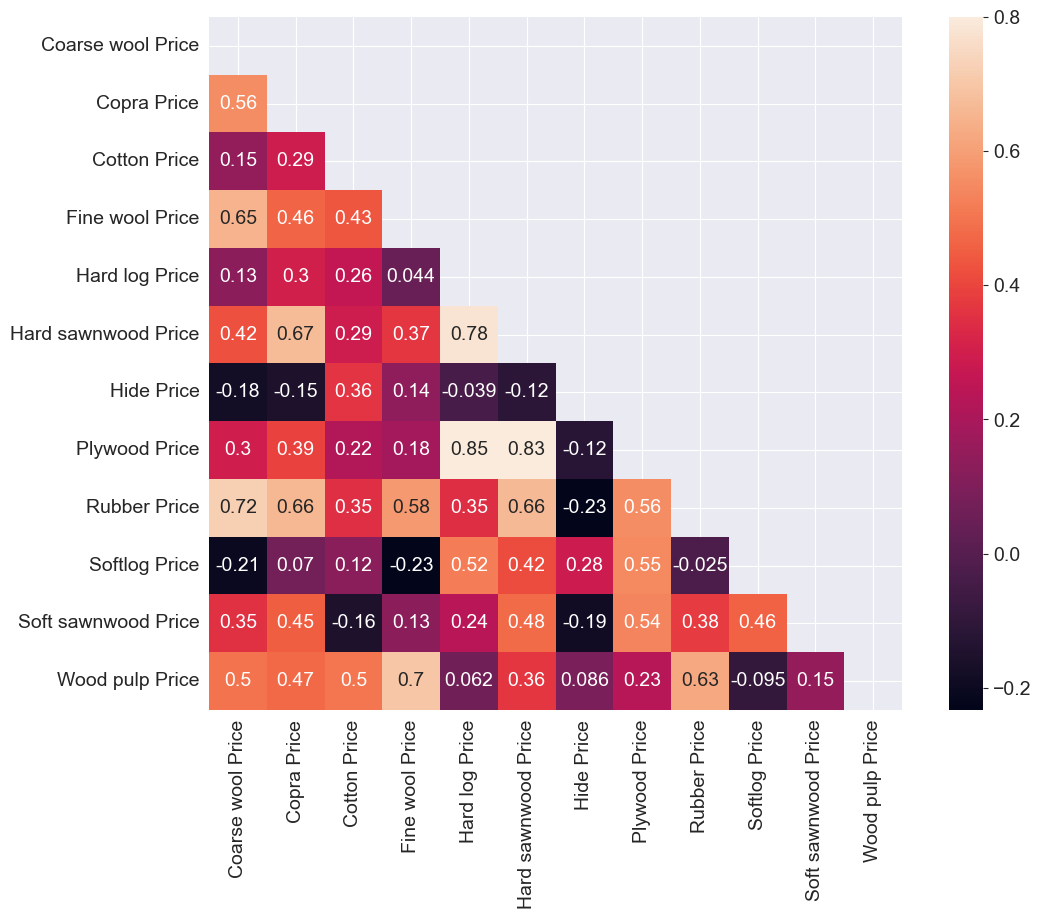

In [119]:
#raw materials list
raw_data = ['Coarse wool Price', 'Copra Price', 'Cotton Price', 'Fine wool Price', 'Hard log Price', 
           'Hard sawnwood Price', 'Hide Price', 'Plywood Price', 'Rubber Price', 'Softlog Price',
          'Soft sawnwood Price', 'Wood pulp Price']
#getting the correlation matrix
corrmat = df[raw_data].corr()
#setting the size of plot
fig = plt.figure(figsize = (12, 9))
#masking the upper triangle part since matrix is symmetric(repetitive)
mask = np.triu(np.ones_like(corrmat, dtype=bool))
sns.heatmap(corrmat, vmax=.8, mask=mask, square=True, annot=True)
plt.show()

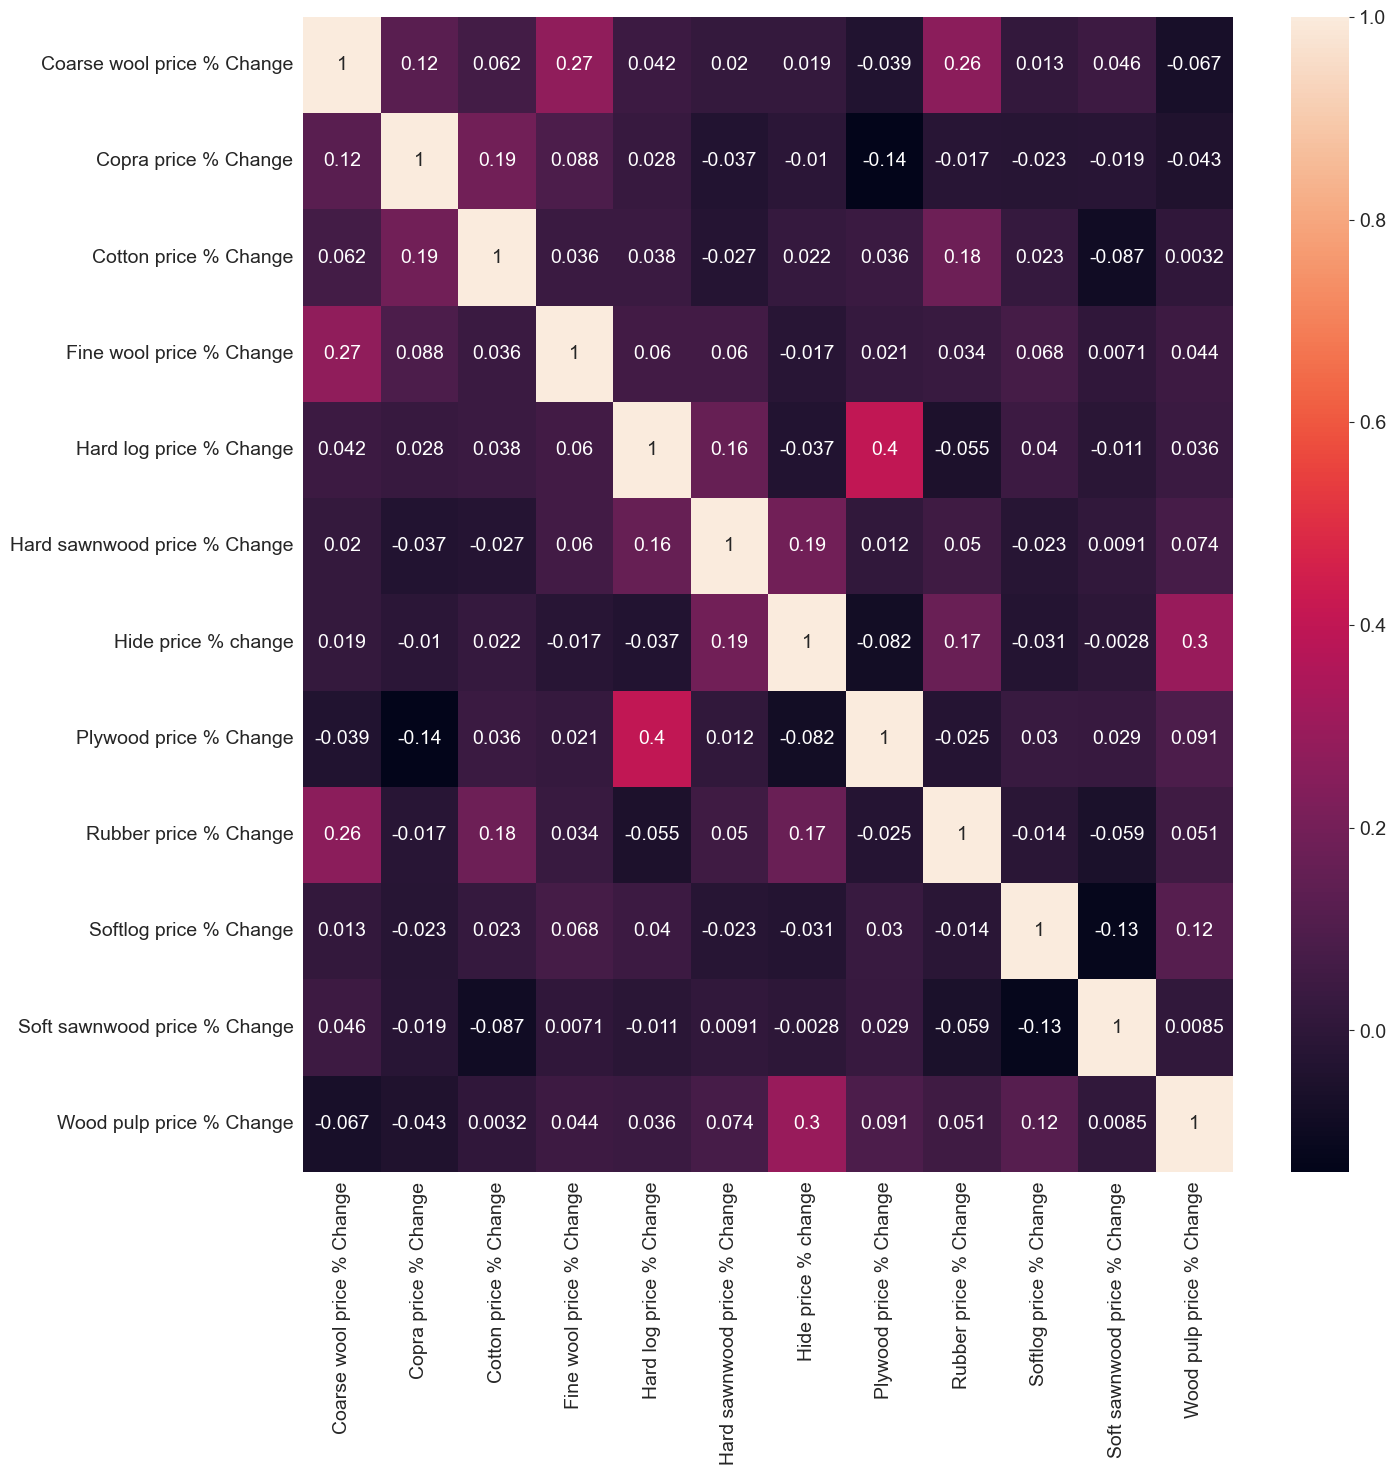

In [94]:
plt.figure(figsize=(15, 15))
changelist = ['Coarse wool price % Change', 'Copra price % Change', 'Cotton price % Change',
              'Fine wool price % Change', 'Hard log price % Change', 
              'Hard sawnwood price % Change', 'Hide price % change', 'Plywood price % Change', 
              'Rubber price % Change', 'Softlog price % Change',
              'Soft sawnwood price % Change', 'Wood pulp price % Change']
#generate a correlation matrix for the whole dataset
corrMatrix = df[changelist].corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

#### From these graphs I can tell that there is almost no relationship between the percentage change in raw material prices
<ul>
    <li>A negative value implies that two variables are negatively correlated (one increases, the other decreases).</li>
    <li>Zero implies no relationship</li>
    <li>Otherwise, the higher the value, the greater the chance of a relationship. Prices and their % change graphs</li>
</ul>

#### Coarse Wool

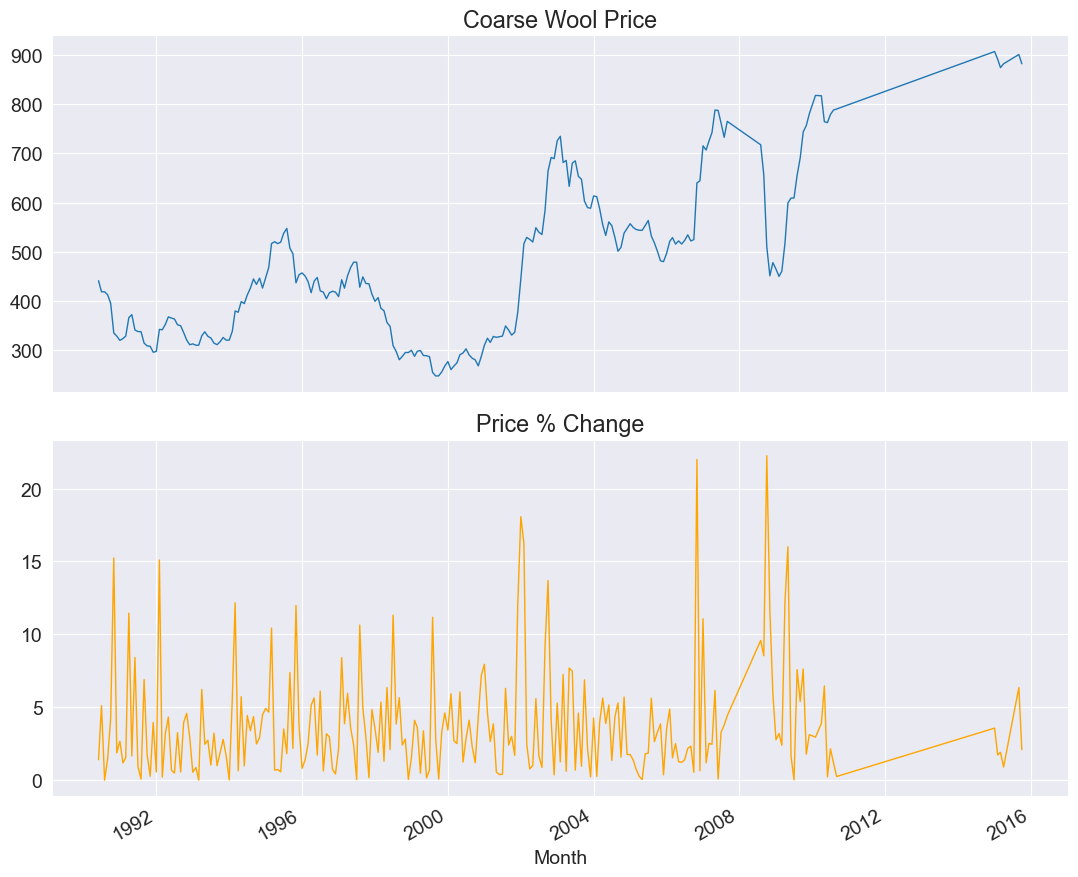

In [108]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(11, 9), sharex=True)

df['Coarse wool Price'].plot(ax=axes[0], title='Coarse Wool Price', linewidth=1)
df['Coarse wool price % Change'].plot(ax=axes[1], title='Price % Change', linewidth=1, color='orange')

plt.tight_layout()
plt.show()

#### In the same way I can find the visualization of all the other resources provided in the dataset

### Discovering the normal price variation of each raw material

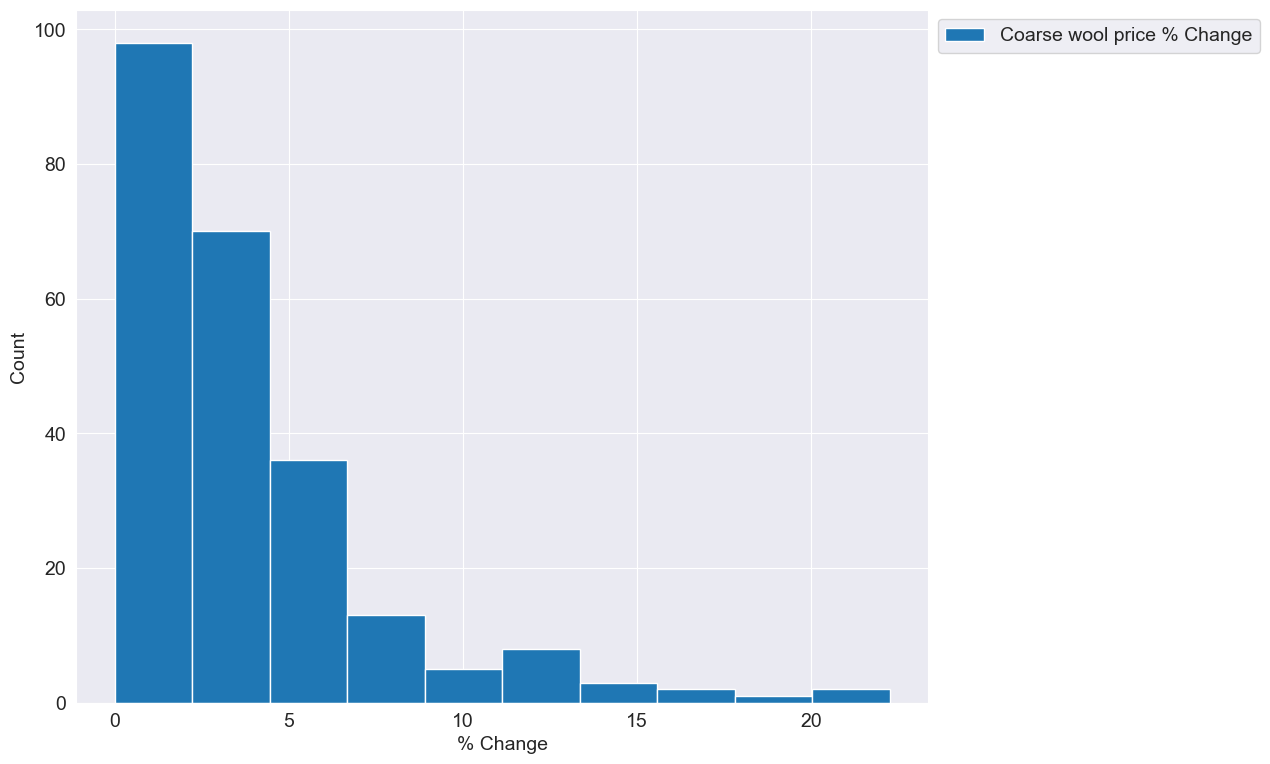

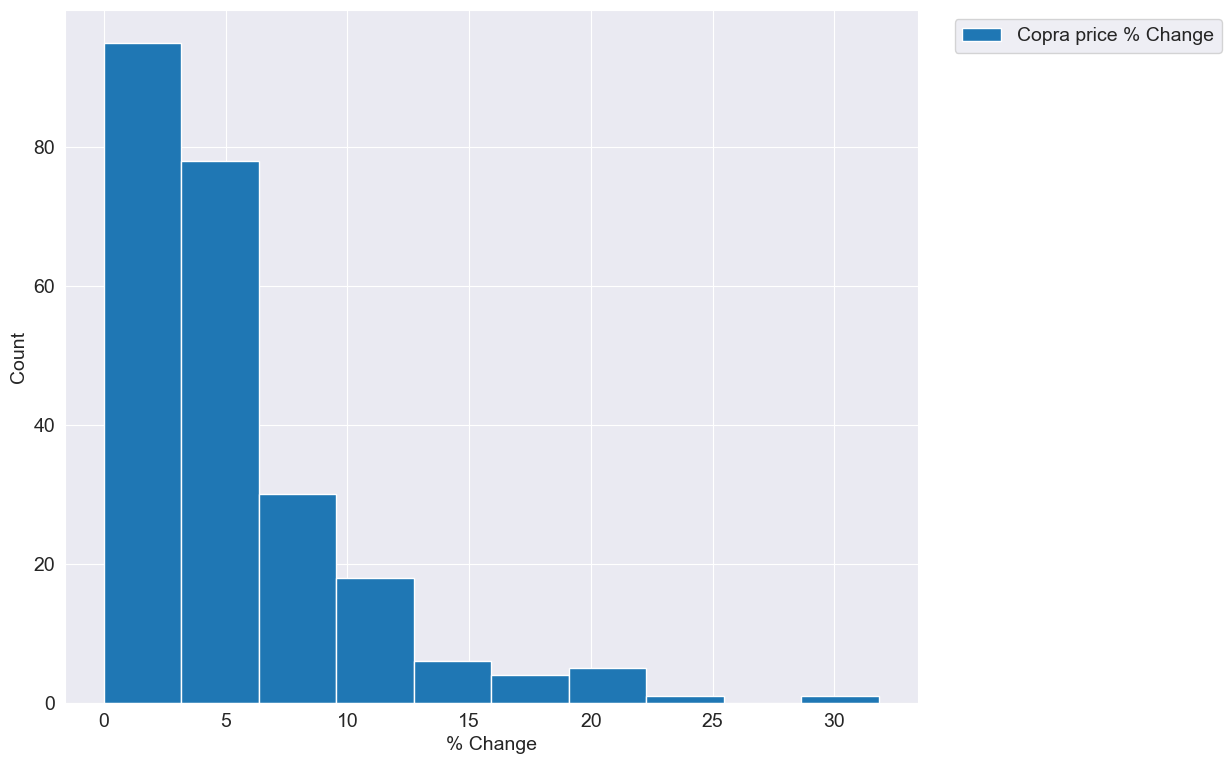

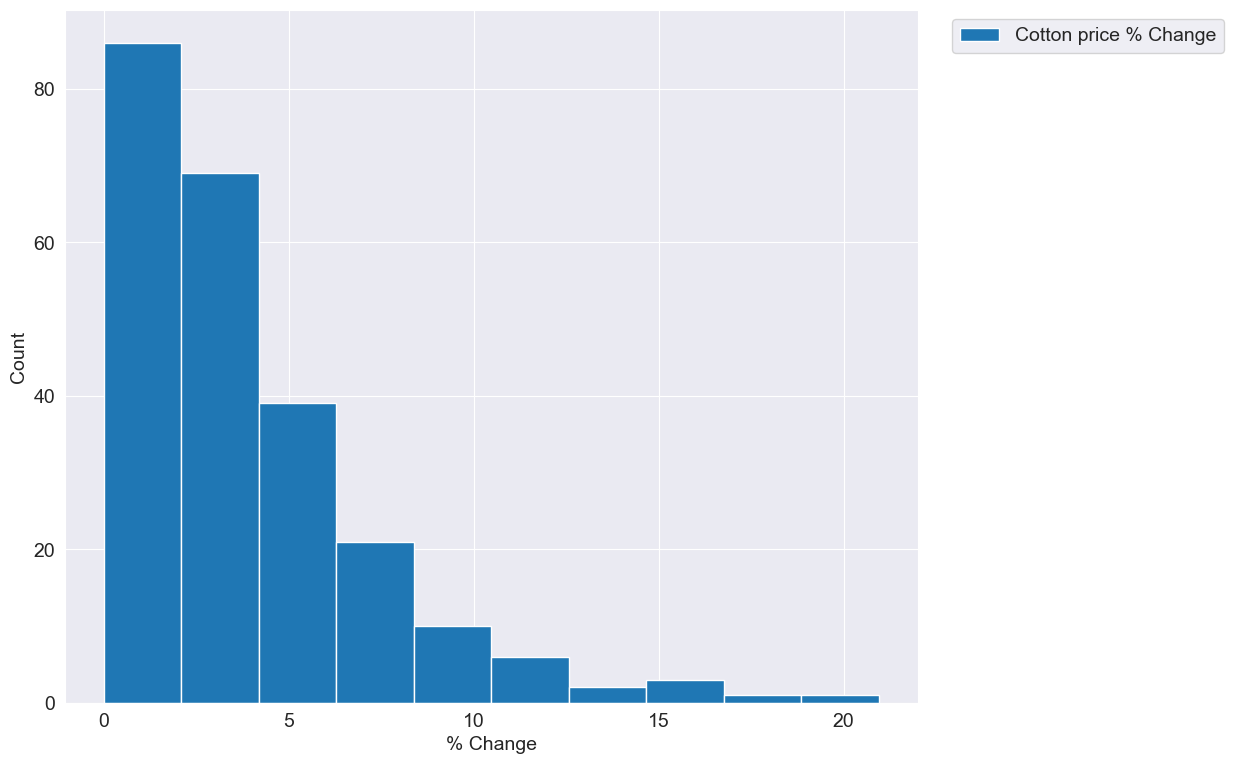

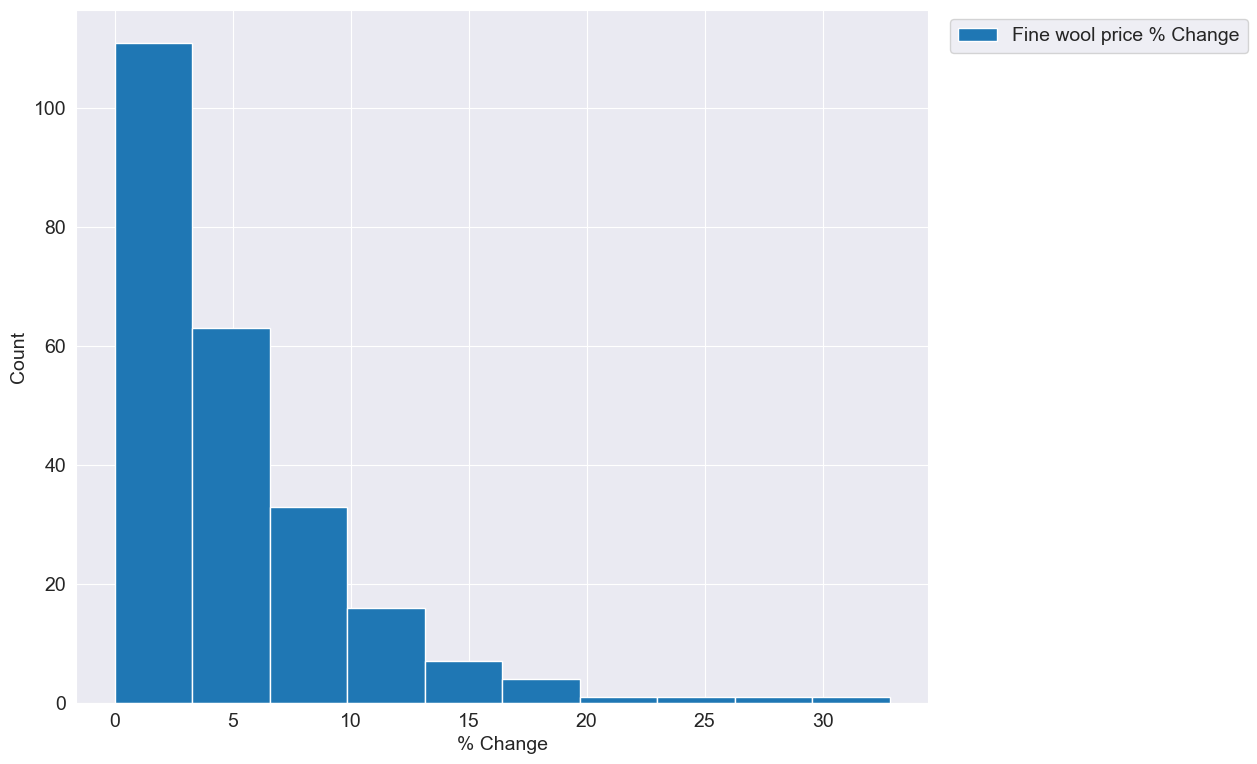

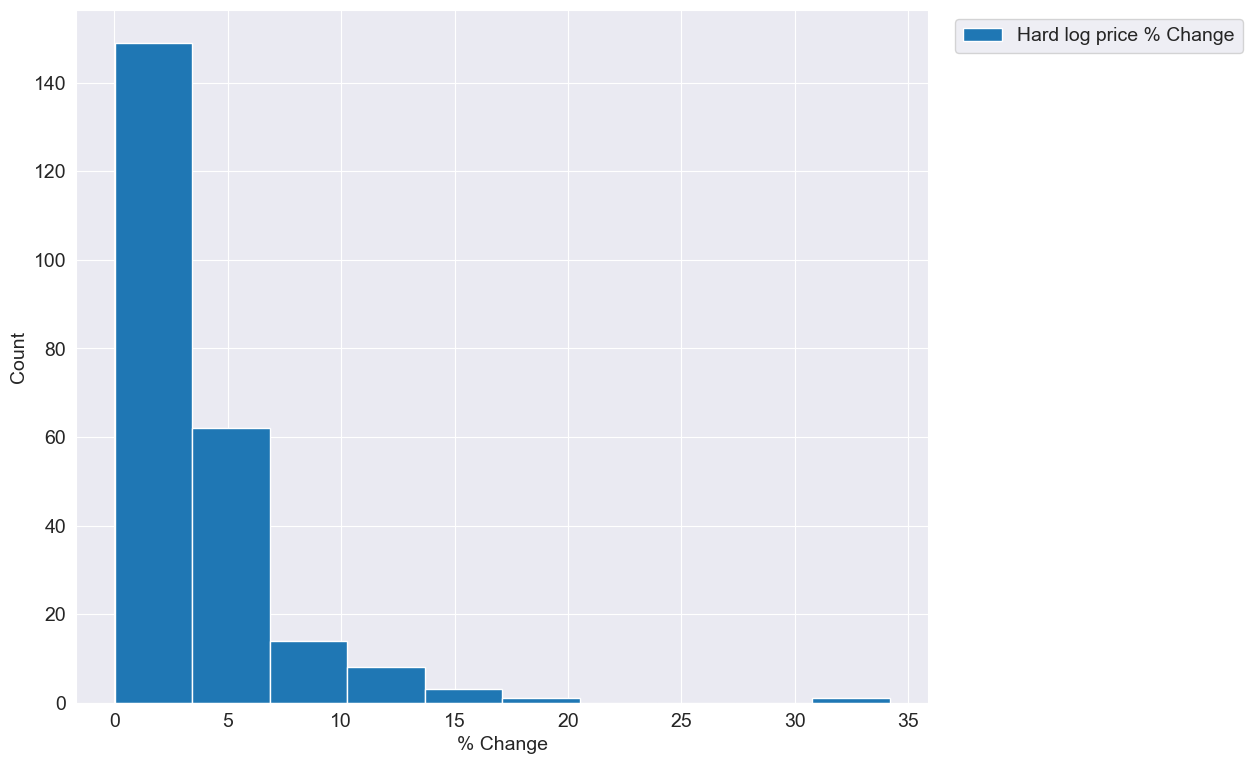

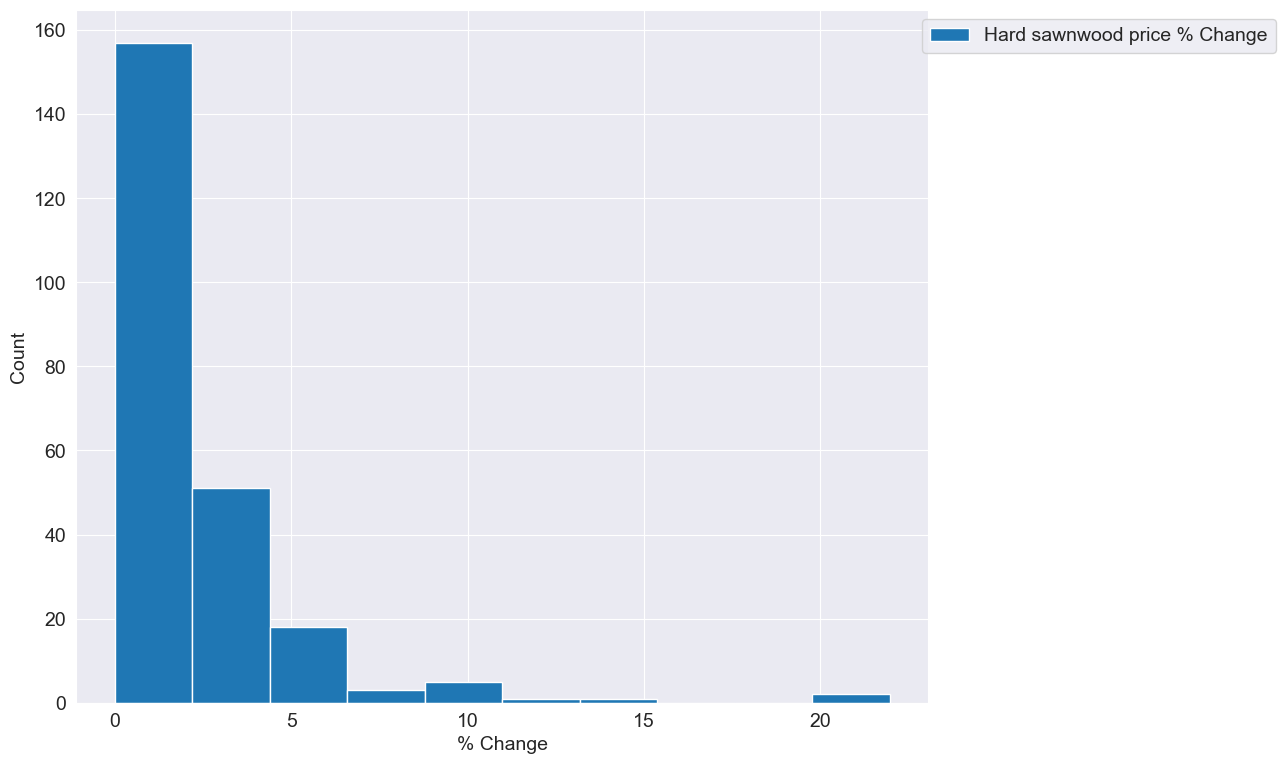

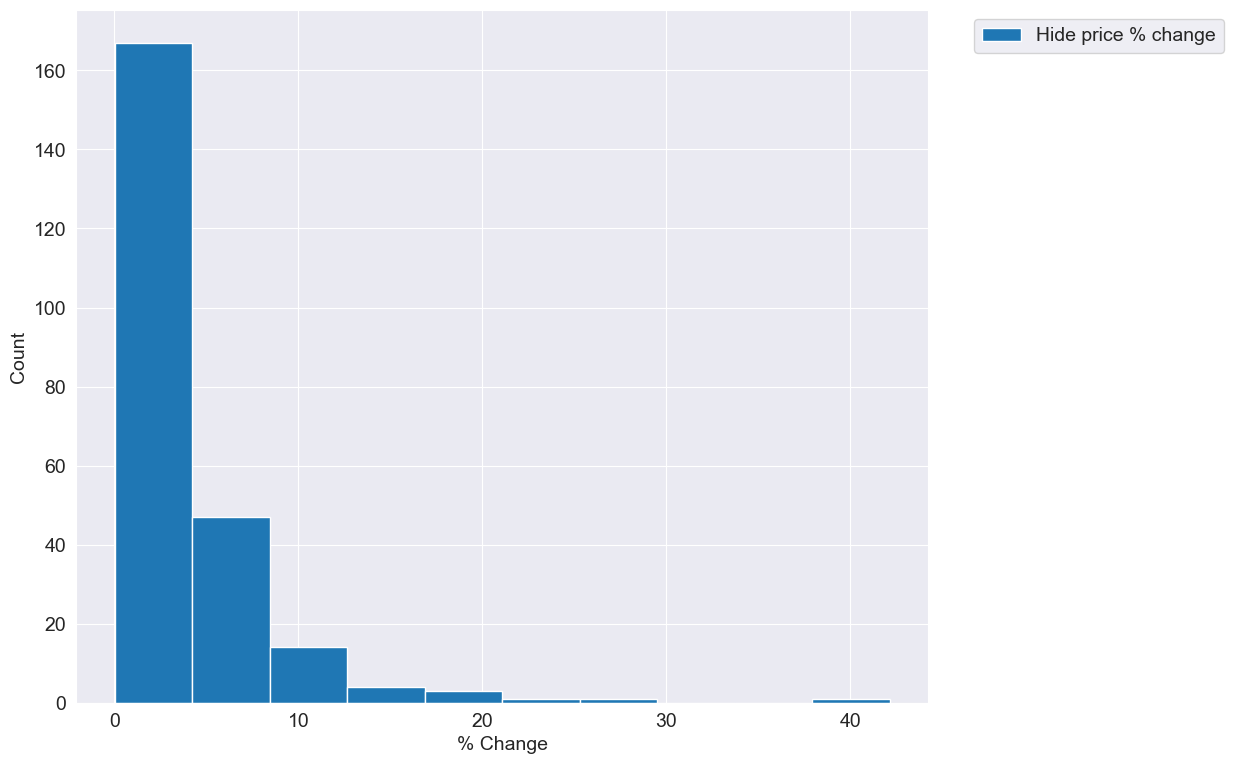

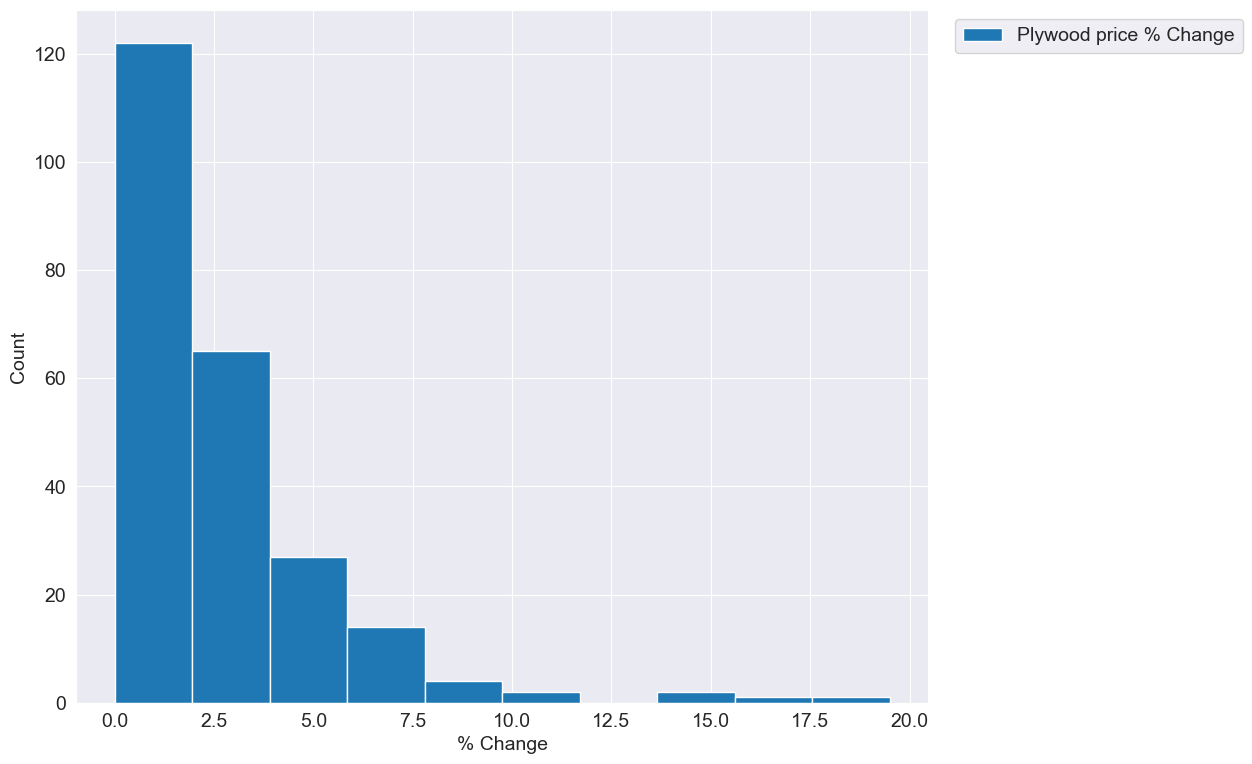

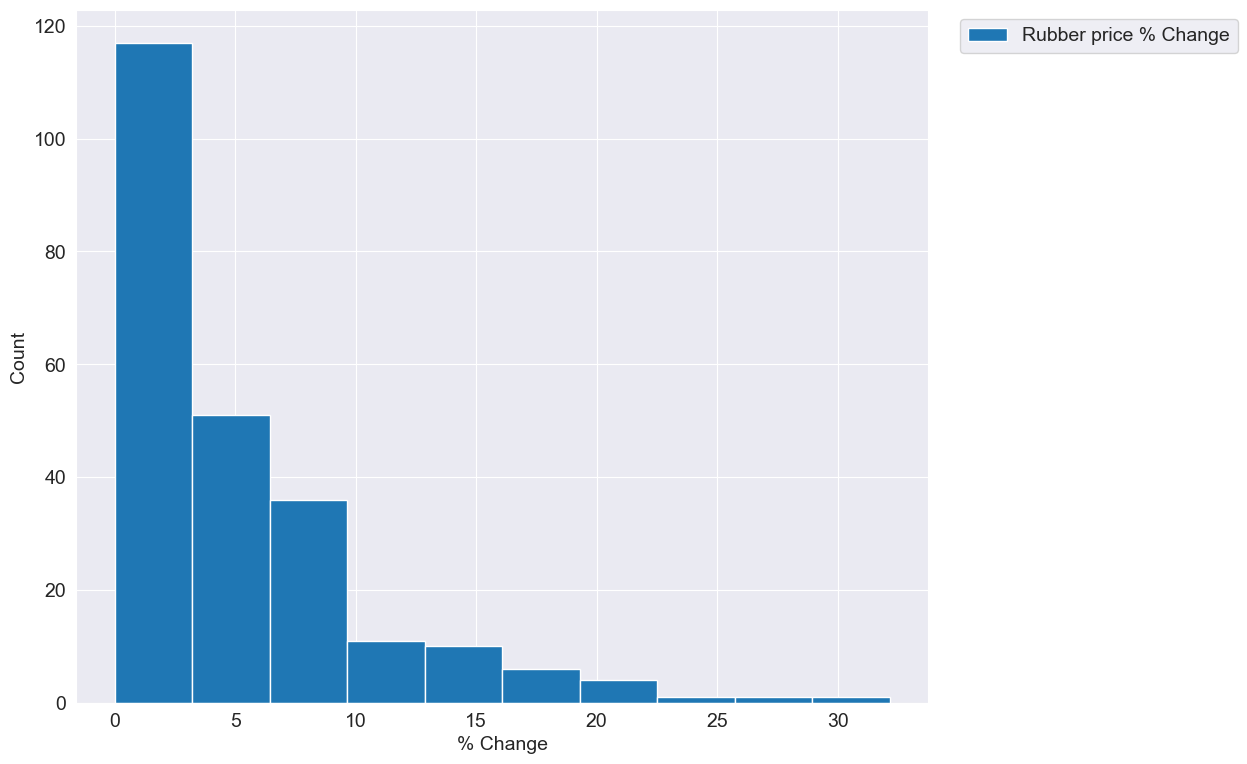

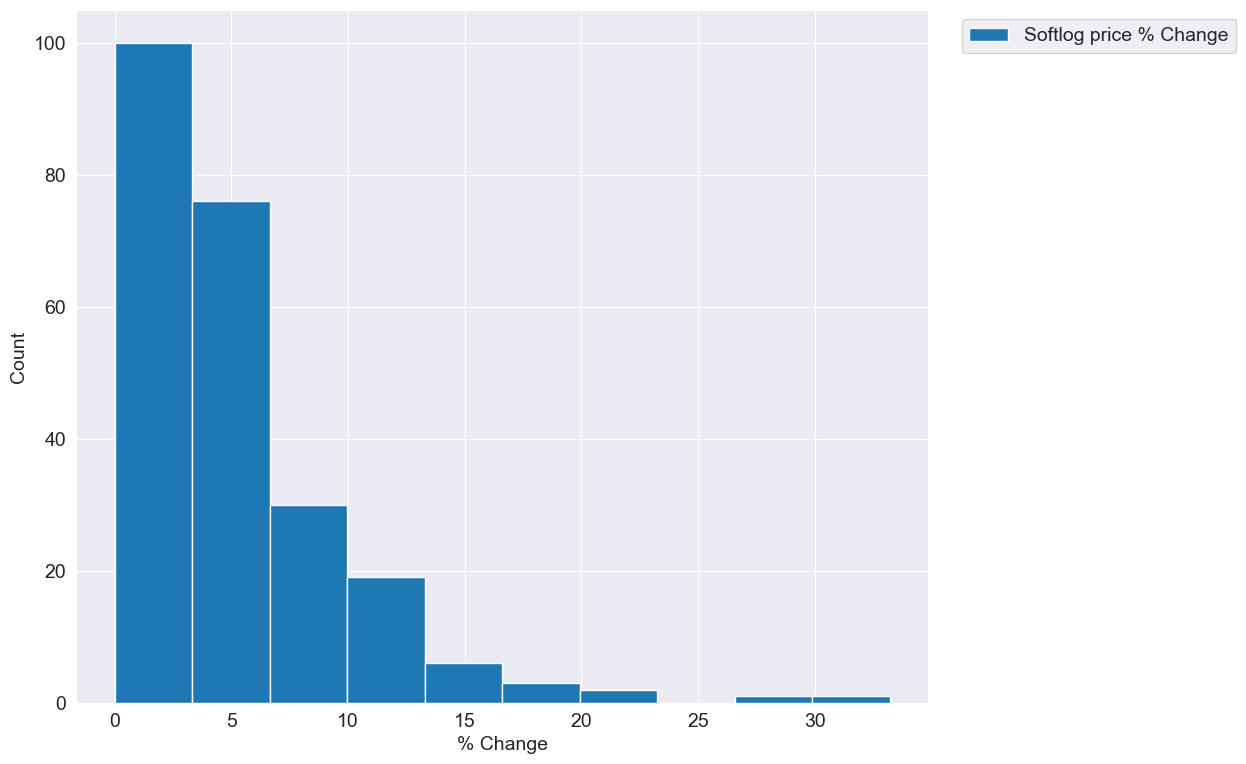

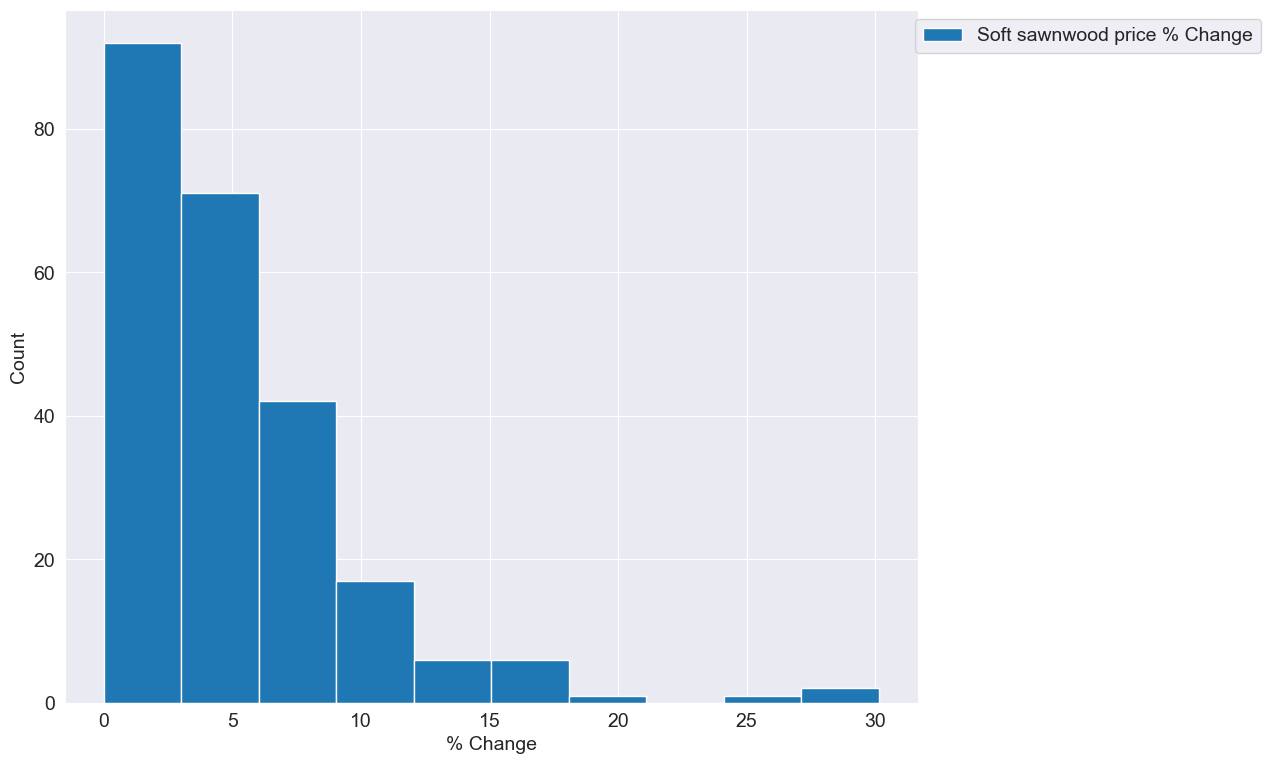

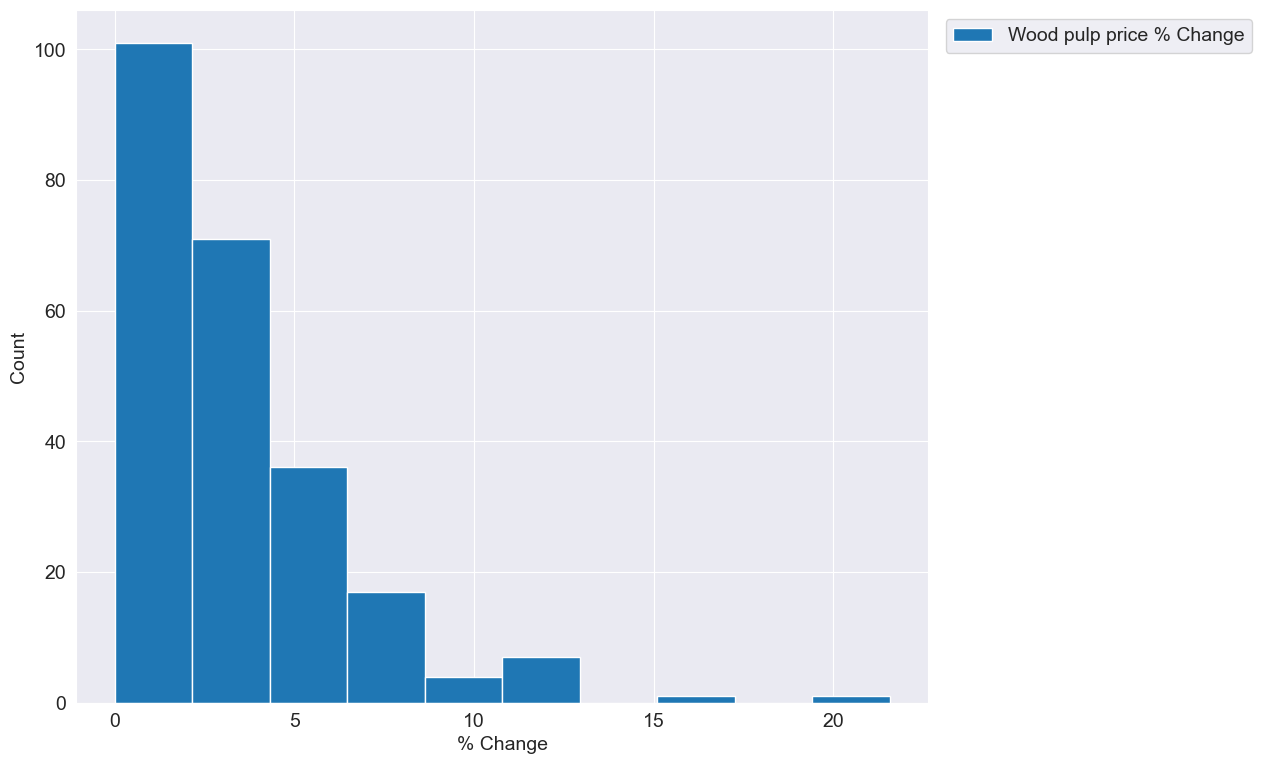

In [111]:
for i in range(len(changelist)):
    plt.figure(figsize=(12, 12))
    df[changelist[i]].hist(figsize=(11, 9), linewidth=1)
    plt.xlabel('% Change')
    plt.ylabel('Count')
    plt.legend(changelist[i:], loc='upper center', bbox_to_anchor=(1.2, 1))
plt.show()

#### We can see that the majority of raw materials have a % of ideal frequent variation of less than 5%

### Finding out which raw material has the lowest price over the years

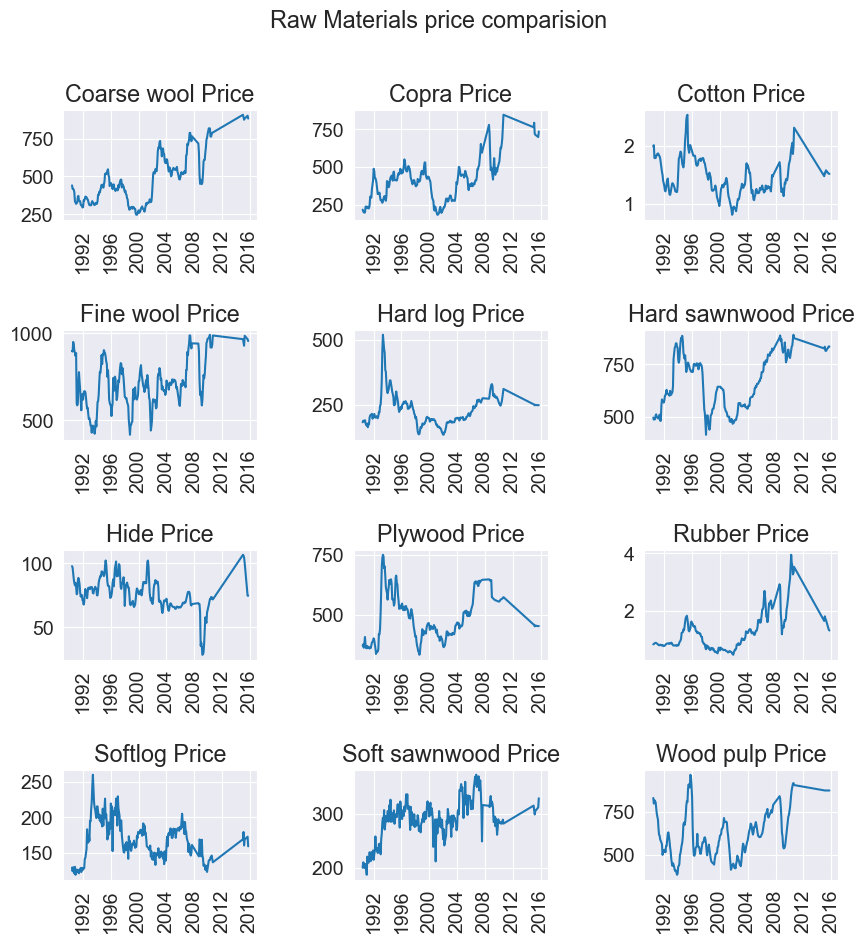

In [120]:
plt.figure(figsize=(10, 10))
for i in range(len(raw_data)):
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(raw_data[i])
    plt.plot(df[raw_data[i]])
    plt.xticks(rotation=90)
plt.suptitle('Raw Materials price comparision')
plt.show()

#### We can see that cotton and rubber have the lowest prices. I'll compare the prices to see which is the lowest

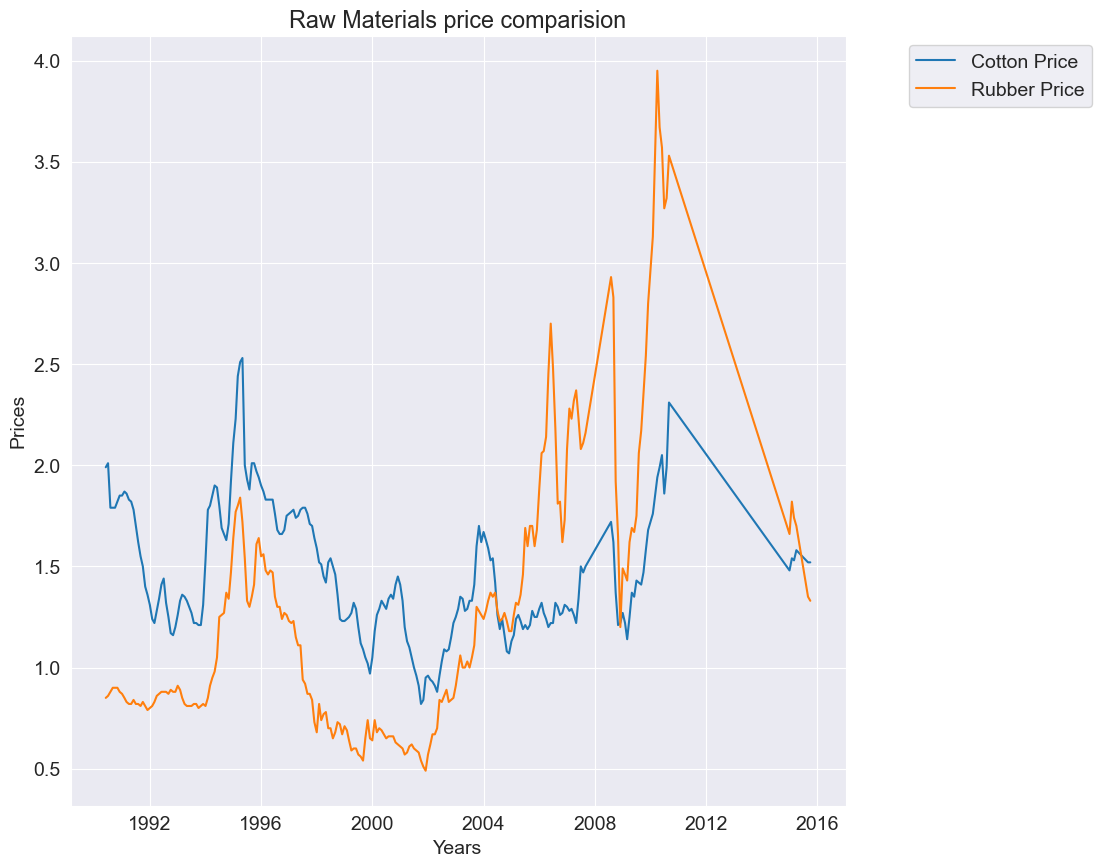

In [128]:
plt.figure(figsize=(10, 10))
plt.plot(df[['Cotton Price', 'Rubber Price']])
plt.title('Raw Materials price comparision')
plt.xlabel('Years')
plt.ylabel('Prices')
plt.legend(['Cotton Price', 'Rubber Price'],loc='upper center', bbox_to_anchor=(1.2, 1))
plt.show()

#### We can see that <strong>cotton</strong> is the raw material with the lowest price in recent years
But both <strong>cotton</strong> and <strong>rubber</strong> are cheap materials.<br>

### Which raw material has the higher variation in price %

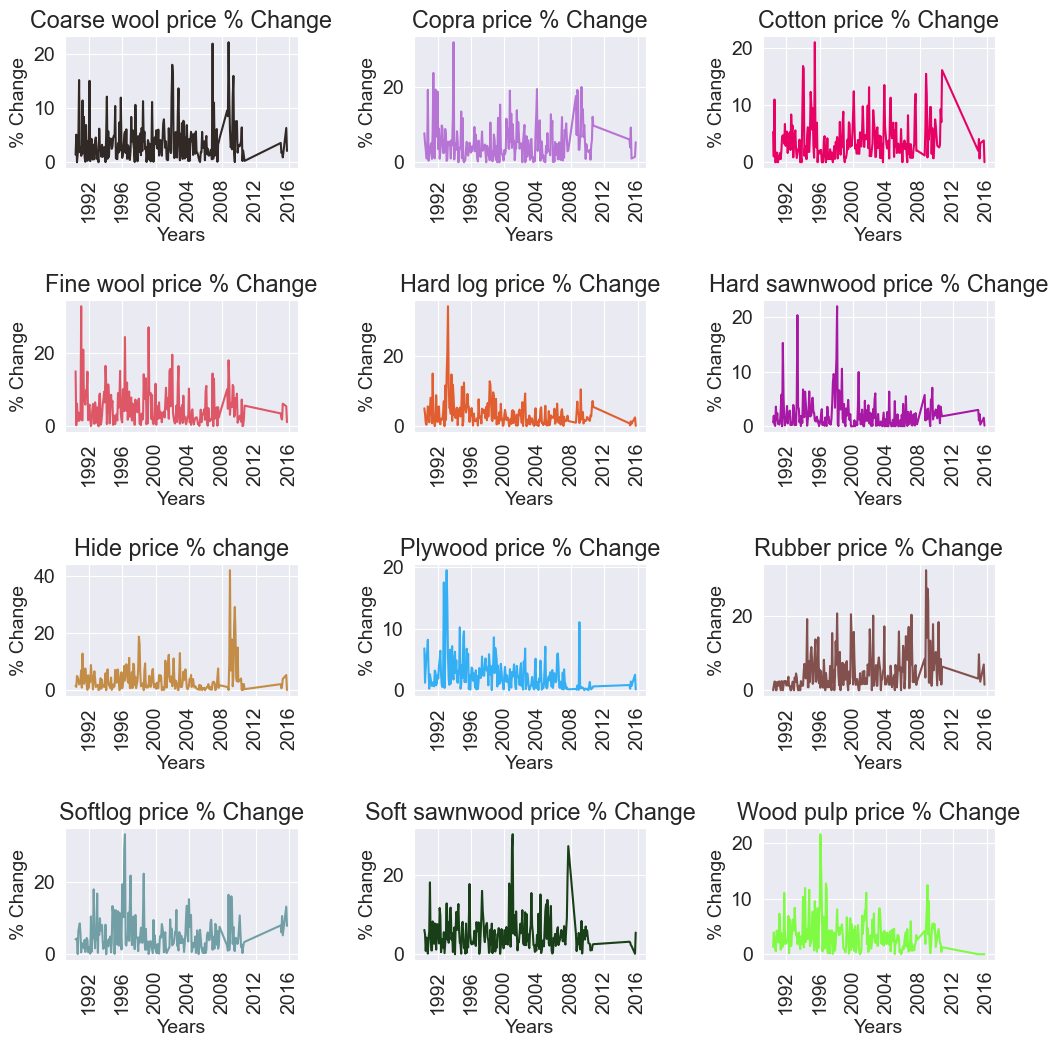

In [130]:
plt.figure(figsize=(12, 12))
for i in range(len(changelist)):
    r = random.random()
    g = random.random()
    b = random.random()
    color = (r, g, b)
    plt.subplot(4, 3, i+1)
    plt.subplots_adjust(hspace=1, wspace=0.5)
    plt.title(changelist[i])
    plt.plot(df[changelist[i]], c = color)
    plt.xticks(rotation=90)
    plt.xlabel('Years')
    plt.ylabel('% Change')
plt.show()

#### We can see that the highest % of change is Hide, while many have low change

### Finding raw materials with drastic price changes

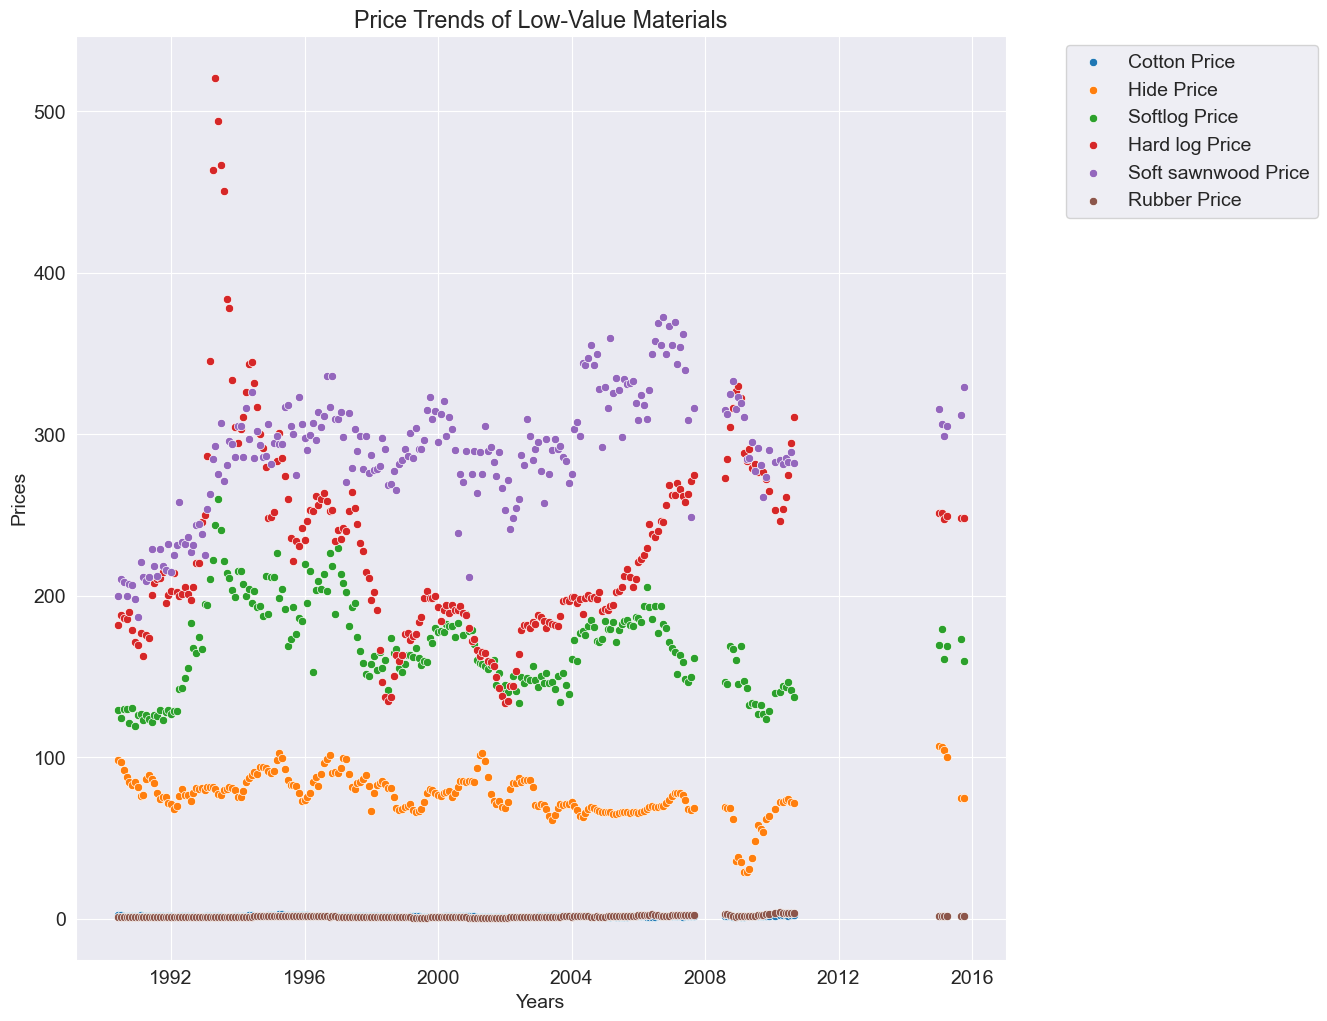

In [134]:
lowlist = ['Cotton Price', 'Hide Price', 'Softlog Price', 'Hard log Price', 'Soft sawnwood Price', 'Rubber Price']

plt.figure(figsize=(12, 12))
plt.ylabel('Prices')
plt.xlabel('Years')

for material in lowlist:
    sns.scatterplot(x=df.index, y=df[material], label=material)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))
plt.title('Price Trends of Low-Value Materials')
plt.show()

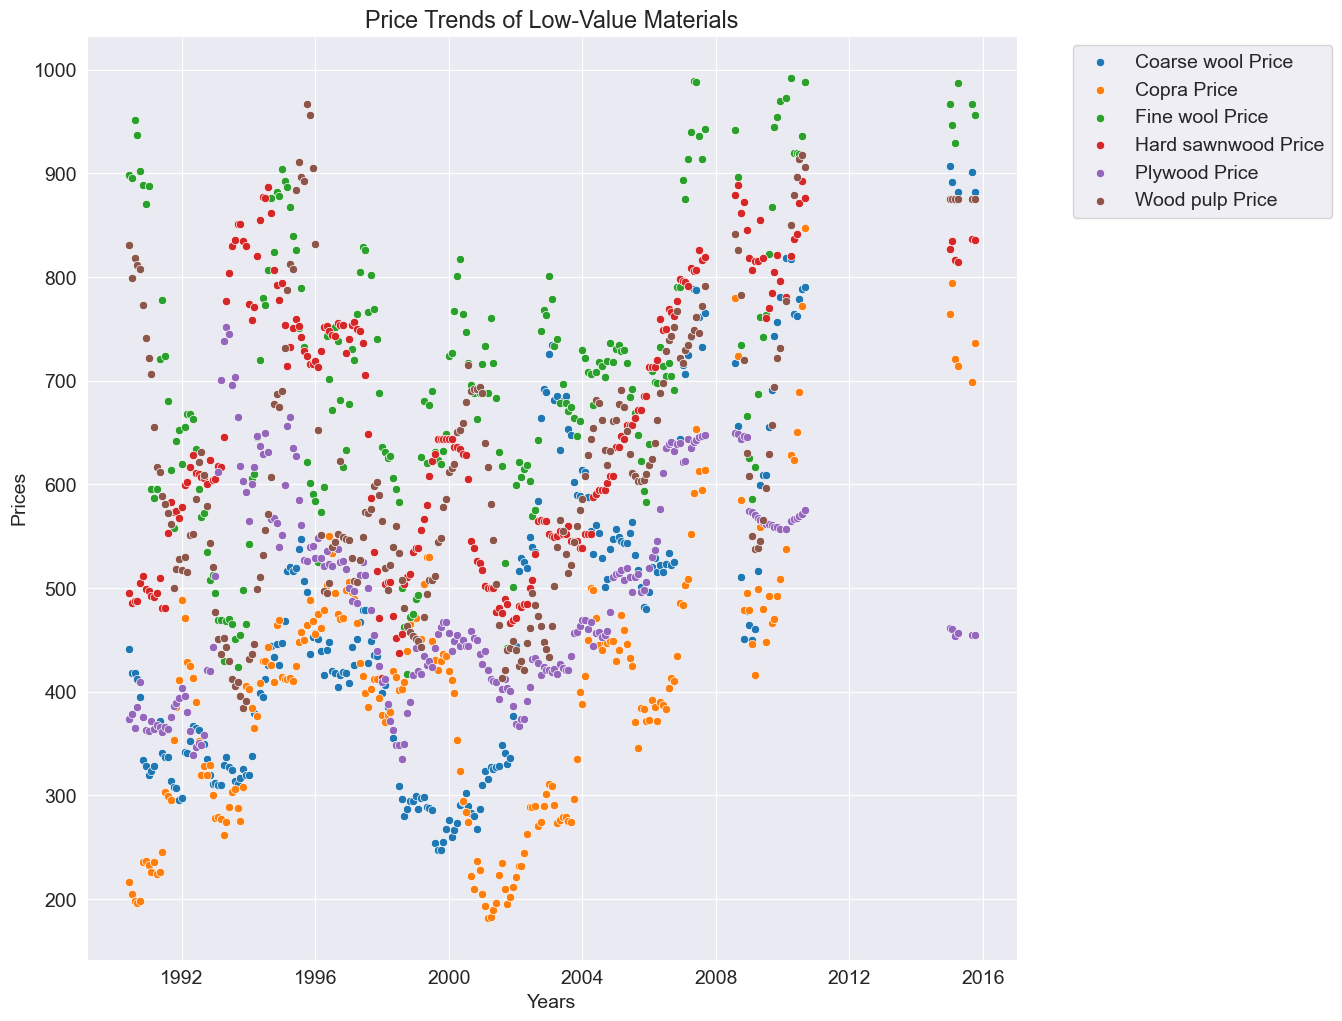

In [135]:
highlist = ['Coarse wool Price', 'Copra Price', 'Fine wool Price', 'Hard sawnwood Price', 'Plywood Price', 'Wood pulp Price']

plt.figure(figsize=(12, 12))
plt.ylabel('Prices')
plt.xlabel('Years')

for material in highlist:
    sns.scatterplot(x=df.index, y=df[material], label=material)

plt.legend(loc='upper center', bbox_to_anchor=(1.2, 1))
plt.title('Price Trends of Low-Value Materials')
plt.show()

#### The most drastic price change among low-cost materials is hard log and among high-cost materials is fine wool

### Discovering the price range of low-cost raw materials

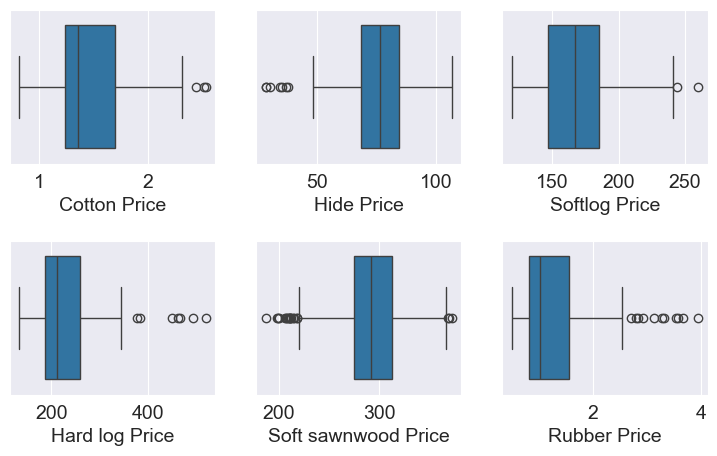

In [137]:
for i in range (6):
    plt.subplot(2, 3, i+1)
    plt.subplots_adjust(hspace=0.5)
    sns.boxplot(x=df[lowlist[i]])
plt.show()

#### Includes: The interquartile range is between Q3 and Q1 minimum, first quartile(Q1), median, third quartile(Q3) and maximum and outliers

### Inferences and conclusion
<ul>
    <li>We discover the high-end and low-end raw materials according to their prices</li>
    <li>High and low % variation of materials</li>
    <li>We were able to identify the variation in prices over the years</li>
    <li>Correlation between them using a heat map</li>
</ul>